In [43]:
%matplotlib widget
from generate_files import *
from essential_func import *
qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

samples_csv                = 'data_directory.csv'
default_sample_dir         = 'Mar-2023-Sample#1971'       # 'July-2021-Sample#6'    '21-Nov'   'July-sorted'   '20-Dec'    '22-Oct'   'Oct-2022-1971'   'Mar-2023-Sample#1898'
csv_and_code_abs_directory = '/Users/bashit.a/Documents/Alzheimer/Codes/'

_,dropdown_name_list, cwd, exp_folder = change_python_path(dropdown_name = default_sample_dir, csv_file_location = csv_and_code_abs_directory, samples_csv = samples_csv)
## semi-specs
qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

Python directory is set to load samples from : Mar-2023-Sample#1971


In [22]:
### list of all files in cwd with masked and intp, if no masking was done-will not count in here
raw_file_list = []
for file in sorted(cwd_files_search_with(seek_str='.h5', search_where = 'end', directory = cwd)):
    if file.find('_masked') >= 0:
        raw_file_list.append(file)
    if file.find('_masked_intp') >= 0:
        raw_file_list.remove(file.split('_intp')[0]+'.h5' )

raw_file_list

['1898_CING-roi0_0_0_masked.h5',
 '1898_CING-roi1_0_0_masked.h5',
 '1898_EC-roi0_0_0_masked_intp.h5',
 '1898_EC-roi1_0_0_masked_intp.h5',
 '1898_EC-roi2_0_0_masked.h5',
 '1898_EC_bkg-roi0_0_0_masked.h5',
 '1898_HIPPO-roi0_0_0_masked_intp.h5',
 '1898_HIPPO-roi1_0_0_masked_intp.h5',
 '1898_HIPPO-roi2_0_0_masked_intp.h5',
 '1898_HIPPO_bkg-roi0_0_0_masked.h5',
 '1898_PHG-roi0_0_0_masked.h5',
 '1898_PHG-roi1_0_0_masked_intp.h5',
 '1898_PHG_bkg-roi0_0_0_masked.h5',
 '1898_V1-roi0_0_0_masked.h5',
 '1898_V1-roi1_0_0_masked.h5',
 '1898_V2-roi0_0_0_masked_intp.h5',
 '1898_V2-roi1_0_0_masked_intp.h5']

In [21]:
## Generate Excel file of 1-d averaging for SAXS and WAXS data
# specs
files = ["1971_Hippo-roi0_0_0_masked_intp.h5 ", "1971_Hippo-roi1_0_0_masked_intp.h5 "] #raw_file_list # cwd_files_search_with(seek_str='.h5')      # ['2512_EC-roi1_masked.h5']      ["2048_B8_masked.h5", '2109_EC-roi1_masked.h5'] or    cwd_files_search_with(seek_str='_masked.h5')
scatterings = ('merged',)   # ('_SAXS', '_WAXS2','merged')

for file in files:
    #generate_excel_file(file, qgrid2, scattering, method='one-frame', frame=0)
    for scattering in scatterings:
        generate_excel_file(file, qgrid2, scattering,  method='all-frames', with_q=True)   # method='one-frame', frame=10 or  method = 'all-frames'
        generate_excel_file(file, qgrid2, scattering,  method='all-frames', folder='CSV_Conv-8-point', with_q=True, window_size=8)   # method='one-frame', frame=10 or  method = 'all-frames'
        print(f'\n\nSuccessfully generated CSV for {file} \n\n')
    print(f'WIDTH, HEIGHT = {width_height(file)}')

merged Q = , [0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012 0.013 0.014 0.015 0.016
 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024 0.025 0.026 0.027 0.028
 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036 0.037 0.038 0.039 0.04
 0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048 0.049 0.05  0.052 0.054
 0.056 0.058 0.06  0.062 0.064 0.066 0.068 0.07  0.072 0.074 0.076 0.078
 0.08  0.082 0.084 0.086 0.088 0.09  0.092 0.094 0.096 0.098 0.1   0.105
 0.11  0.115 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165
 0.17  0.175 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225
 0.23  0.235 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285
 0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345
 0.35  0.355 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405
 0.41  0.415 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465
 0.47  0.475 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525
 0.53  0.535 0.54  0.545 0.55  0.555 0.

In [5]:
## export to Matlab mat format (to be working with Biel data)
file = '2016_B8.h5'
scattering = 'merged'
with h5py.File(file,'r') as hdf:
    Iq = hdf.get(file.split('.')[0] + '/processed')        # Iq = hdf.get('2048_B16/processed')
    Iq = np.array(Iq.get(scattering))                      # Iq = np.array(2048_B16/processed/merged')
    Iq = Iq[:,0,:]                                         # Iq shape (3721, 690)
    Iq = np.expand_dims(Iq,axis=1)                         # Iq shape (3721, 1, 690)

    if not os.path.exists('MATLAB'):
        os.makedirs('MATLAB')
    mat_contents = {}
    mat_contents['SAXS_CircAv'] = {}
    mat_contents['SAXS_CircAv']['BandAngles'] = qgrid2
    mat_contents['SAXS_CircAv']['CircAv'] = Iq
    sio.savemat(f'{file}.mat', mat_contents);

In [4]:
## heat plots for all files in a folder
%matplotlib widget

scatterings = ('_SAXS', '_WAXS2')
qgrid2 = np.hstack([np.arange(0.005, 0.0499, 0.001), np.arange(0.05, 0.099, 0.002), np.arange(0.1, 3.2, 0.005)])

plot_all_heat_maps_cwd('output.pdf', qgrid2, scatterings, seek_str='_masked.h5')

Loading file 1934_B8_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
1934_B8_masked.h5 Task Finished. Figure Number =  1
Loading file 1934_SN_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
1934_SN_masked.h5 Task Finished. Figure Number =  2
Loading file 1934_SNa_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
1934_SNa_masked.h5 Task Finished. Figure Number =  3
Loading file 1943_B1_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
1943_B1_masked.h5 Task Finished. Figure Number =  4
Loading file 1943_B1a_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
1943_B1a_masked.h5 Task Finished. Figure Number =  5
Loading file 2016_B8_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
2016_B8_masked.h5 Task Finished. Figure Number =  6
Loading file 2016_B8a_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
2016_B8a_masked.h5 Task Finished. Figure Number =  7
Loading file 2016_B8b_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
2016_B8b_masked.h5 Task Finished. Figure Number =  8
Loading file 2016_B8c_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
2016_B8c_masked.h5 Task Finished. Figure Number =  9
Loading file 2047_B1_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
2047_B1_masked.h5 Task Finished. Figure Number =  10
Loading file 2047_B1a_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
2047_B1a_masked.h5 Task Finished. Figure Number =  11
Loading file 2048_B16_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 564 , high valid Q = 2.570
2048_B16_masked.h5 Task Finished. Figure Number =  12
Loading file 2048_B16a_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 576 , high valid Q = 2.630
2048_B16a_masked.h5 Task Finished. Figure Number =  13
Loading file 2048_B16b_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 576 , high valid Q = 2.630
2048_B16b_masked.h5 Task Finished. Figure Number =  14
Loading file 2048_B6_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
2048_B6_masked.h5 Task Finished. Figure Number =  15
Loading file 2048_B8_masked.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

low valid idx = 2, low valid Q = 0.007, high valid idx = 124 , high valid Q = 0.370
low valid idx = 109, low valid Q = 0.295, high valid idx = 578 , high valid Q = 2.640
2048_B8_masked.h5 Task Finished. Figure Number =  16
PDF creation Finished


In [7]:
## generate intensity data from h5 file to mat file

file = '2048_B8_masked.h5'
read_Iq(file, scattering='merged')
save_mat(h5_top_group(file) +'_Iq', ('Iq', 'qgrid2'), (Iq, qgrid2))

In [42]:
## generate total number of diffraction patterns in a file
files_sorted = raw_file_list # raw_file_list    cwd_files_search_with('.h5', search_where = 'end')

df = pd.concat([pd.DataFrame([[file, *width_height(file), np.dot(*width_height(file))]], columns = ['File', 'Width', 'Height', 'Total_Diff.']) for file in files_sorted], ignore_index=True)
print(df)
print('\nTotal Diffractions in this folder = ', df.sum()['Total_Diff.'])

                            File  Width  Height  Total_Diff.
0  2029_DG_UNSTAINED-roi0_0_0.h5     62      61         3782
1  2029_DG_UNSTAINED-roi1_0_0.h5     62      61         3782
2               2048-roi0_0_0.h5     61      62         3782
3  2048_B8_UNSTAINED-roi0_0_0.h5     61      62         3782
4  2048_B8_UNSTAINED-roi1_0_0.h5     61      61         3721
5               2428-roi0_0_0.h5     41      40         1640
6               2428-roi1_0_0.h5     62      61         3782

Total Diffractions in this folder =  24271


In [ ]:
### July 2021 July-18 - Wed-21
# Sample#1 - 54281
# Sample#2 - 1212
# Sample#3 - 15676
# Sample#4 - 65422
# Sample#5 - 34850
# Sample#6 - 65101
# Sample#7 - 34847
# Sample#8 - 15336
# Sample#9 - 61365


In [41]:
### list of raw data files list in a directory

raw_file_list = []
for file in cwd_files_search_with(seek_str='.h5', search_where = 'end', directory = cwd):
    raw_file_list.append(h5_top_group(file) + '.h5')
raw_file_list = np.unique(np.array(raw_file_list))
print(raw_file_list)

['2029_DG_UNSTAINED-roi0_0_0.h5' '2029_DG_UNSTAINED-roi1_0_0.h5'
 '2048-roi0_0_0.h5' '2048_B8_UNSTAINED-roi0_0_0.h5'
 '2048_B8_UNSTAINED-roi1_0_0.h5' '2428-roi0_0_0.h5' '2428-roi1_0_0.h5']


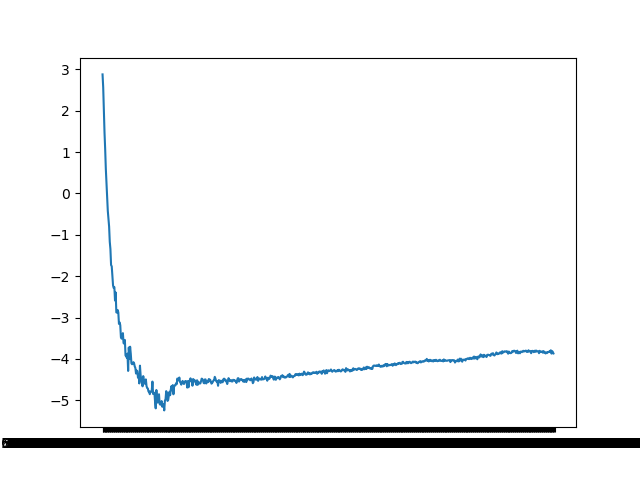

In [11]:
### checking csv file data
file = "2048-roi0_0_0_masked.h5_merged.csv"

df = pd.read_csv(os.path.join(cwd, 'CSV', file))

f= plt.subplots()
plt.plot(np.log(df.loc[3781]))
plt.show()